# AED Titanic
### Importar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Ler train e test

In [2]:
train = pd.read_csv('CSVs/titanic/train.csv')
test = pd.read_csv('CSVs/titanic/test.csv')

### Transformar Id do Passageiro como Index

In [3]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

### Verificar o shape dos dois

In [4]:
train.shape, test.shape

((891, 11), (418, 10))

In [5]:
df = pd.concat([train, test], sort=True)

### Traduzir as colunas

In [6]:
df.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'Pclass', 'Sex',
       'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [7]:
df.columns = ['Idade','Cabine','Embarque','Tarifa','Nome', 
              'PaisFilhos','Classe','Sexo','IrmãosConjuge',
              'Sobreviveu','Bilhete']

In [8]:
df.head()

,Idade,Cabine,Embarque,Tarifa,Nome,PaisFilhos,Classe,Sexo,IrmãosConjuge,Sobreviveu,Bilhete
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


### Mapear Sexo: homem, mulher

In [9]:
df['Sexo'] = df['Sexo'].map({'male':'homem','female':'mulher'})

## Parâmetros Categóricos

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Idade          1046 non-null   float64
 1   Cabine         295 non-null    object 
 2   Embarque       1307 non-null   object 
 3   Tarifa         1308 non-null   float64
 4   Nome           1309 non-null   object 
 5   PaisFilhos     1309 non-null   int64  
 6   Classe         1309 non-null   int64  
 7   Sexo           1309 non-null   object 
 8   IrmãosConjuge  1309 non-null   int64  
 9   Sobreviveu     891 non-null    float64
 10  Bilhete        1309 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


### Nominais

In [11]:
# Sexo, Embarque, Sobreviveu

### Ordinais

In [12]:
# Classe

## Parâmetros Numéricos

### Contínuos

In [13]:
# Idade, Tarifa

### Discretos

In [14]:
# PaisFilhos, IrmaosConjuge

### Parâmetros Alfanuméricos

In [15]:
# Bilhete

### Dados incompletos

In [16]:
df.isnull().sum()

Idade             263
Cabine           1014
Embarque            2
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmãosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

### Preencher Embarque com a Moda

In [17]:
df['Embarque'].fillna(df['Embarque'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Idade             263
Cabine           1014
Embarque            0
Tarifa              1
Nome                0
PaisFilhos          0
Classe              0
Sexo                0
IrmãosConjuge       0
Sobreviveu        418
Bilhete             0
dtype: int64

### Informações Gerais (Parâmetros Numéricos)

In [19]:
df.describe()

,Idade,Tarifa,PaisFilhos,Classe,IrmãosConjuge,Sobreviveu
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


### Informações Gerais (Parâmetros Categóricos)

In [20]:
df.describe(include=['O'])

,Cabine,Embarque,Nome,Sexo,Bilhete
count,295,1309,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",homem,CA. 2343
freq,6,916,2,843,11


## Informações da Amostra

### Tamanho da amostra

In [21]:
len(df)

1309

### Proporção total da Amostra em relação à População

In [22]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [23]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [24]:
train['Survived'].value_counts()[1]/len(train)

0.3838383838383838

## Agrupamentos

### Agrupar Classe x Sobrevivência

In [25]:
df[['Classe','Sobreviveu']].groupby(['Classe']) \
.mean().sort_values(by='Sobreviveu', ascending=False) \
.style.background_gradient(cmap='OrRd')

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


### Agrupar Sexo x Sobrevivência

In [26]:
df[['Sexo','Sobreviveu']].groupby(['Sexo']) \
.mean().sort_values(by='Sobreviveu', ascending=False) \
.style.background_gradient(cmap='OrRd')

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


### Agrupar IrmãosConjuge x Sobrevivência

In [27]:
df[['IrmãosConjuge','Sobreviveu']].groupby(['IrmãosConjuge']) \
.mean().sort_values(by='Sobreviveu', ascending=False) \
.style.background_gradient(cmap='OrRd')

,Sobreviveu
IrmãosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [28]:
df[['PaisFilhos','Sobreviveu']].groupby(['PaisFilhos']) \
.mean().sort_values(by='Sobreviveu', ascending=False) \
.style.background_gradient(cmap='OrRd')

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,nan


In [29]:
df[['PaisFilhos','IrmãosConjuge']].corr() \
.style.background_gradient(cmap='OrRd')

,PaisFilhos,IrmãosConjuge
PaisFilhos,1.000000,0.373587
IrmãosConjuge,0.373587,1.000000


## Visualização de Dados

### Gráfico de Barras e Pizza de Sobreviventes

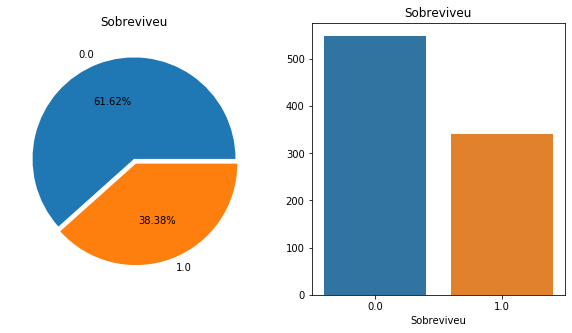

In [30]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
df['Sobreviveu'].value_counts().plot \
.pie(explode=[0,0.05],autopct='%0.2f%%', ax=ax[0])
ax[0].set(title='Sobreviveu', ylabel='')

sns.countplot('Sobreviveu', data=df, ax=ax[1])
ax[1].set(title='Sobreviveu', ylabel='')

plt.show()

### Sobrevivência por Sexo

In [31]:
df.groupby(['Sexo','Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [32]:
df.loc[df['Sexo']=='mulher']['Sobreviveu'].value_counts()

1.0    233
0.0     81
Name: Sobreviveu, dtype: int64

### Gráfico de Barras: Sobreviventes / Sexo

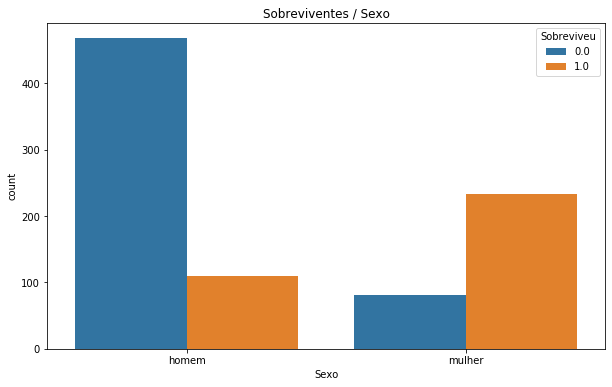

In [33]:
plt.figure(figsize=(10,6))
sns.countplot('Sexo', hue='Sobreviveu', data=df)
plt.title('Sobreviventes / Sexo')
plt.show()

### Histograma de Idade / Sobreviveu

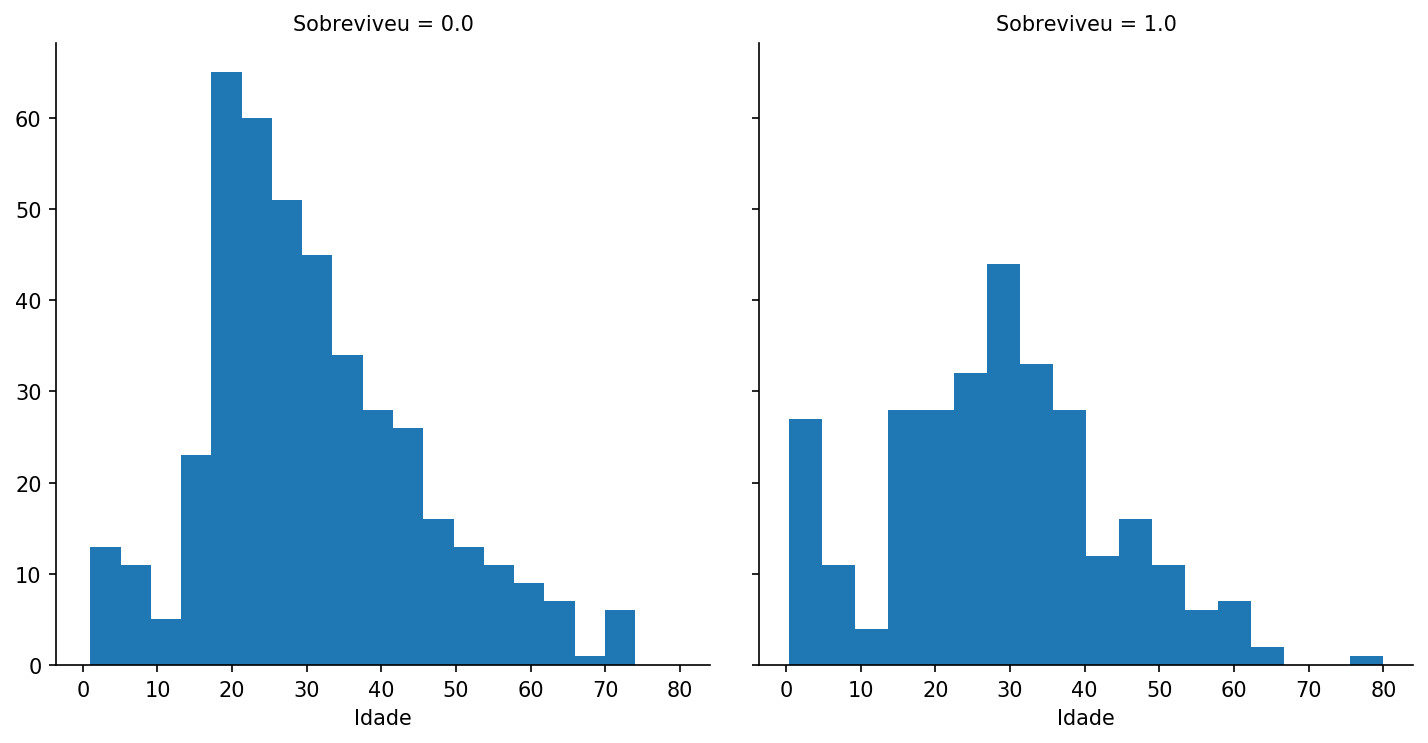

In [34]:
g = sns.FacetGrid(df, col='Sobreviveu')
g.map(plt.hist, 'Idade', bins=18)

fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)

plt.show()

### Histograma de Idade / Classe / Sobreviveu

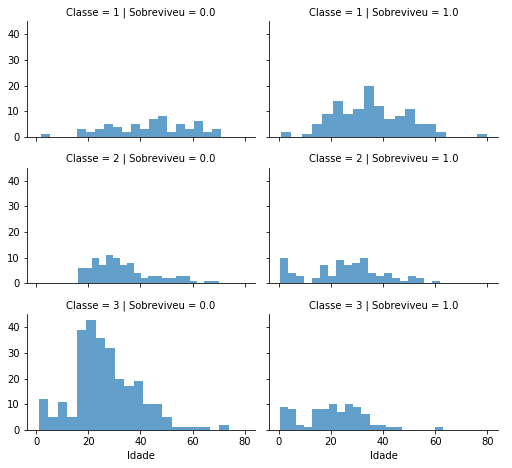

In [35]:
g = sns.FacetGrid(df, col='Sobreviveu', row='Classe', size=2.2, aspect=1.6)
g.map(plt.hist, 'Idade', alpha=0.7, bins=20)
g.add_legend();

### Chances de Sobrevivência por Porto de Embarque

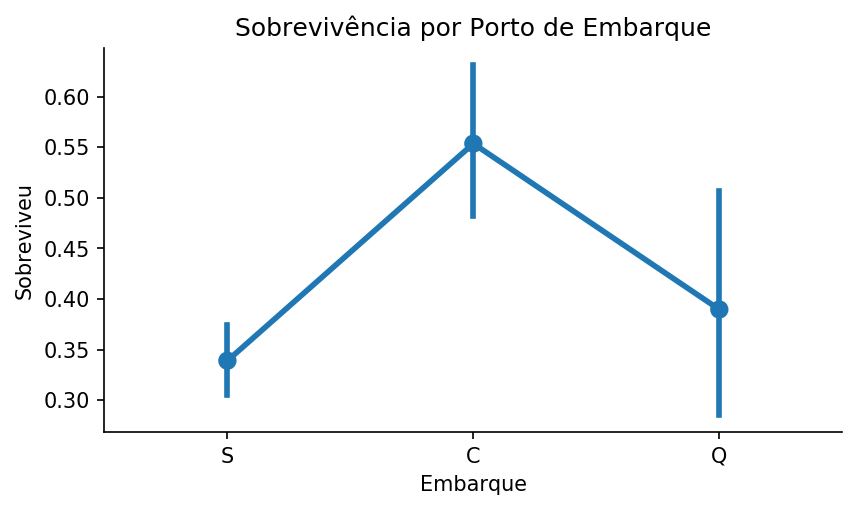

In [36]:
sns.catplot('Embarque','Sobreviveu',data=df, kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)
fig.set_dpi(150)

plt.title('Sobrevivência por Porto de Embarque')
plt.show()

### Embarque x Classe x Sobreviveu

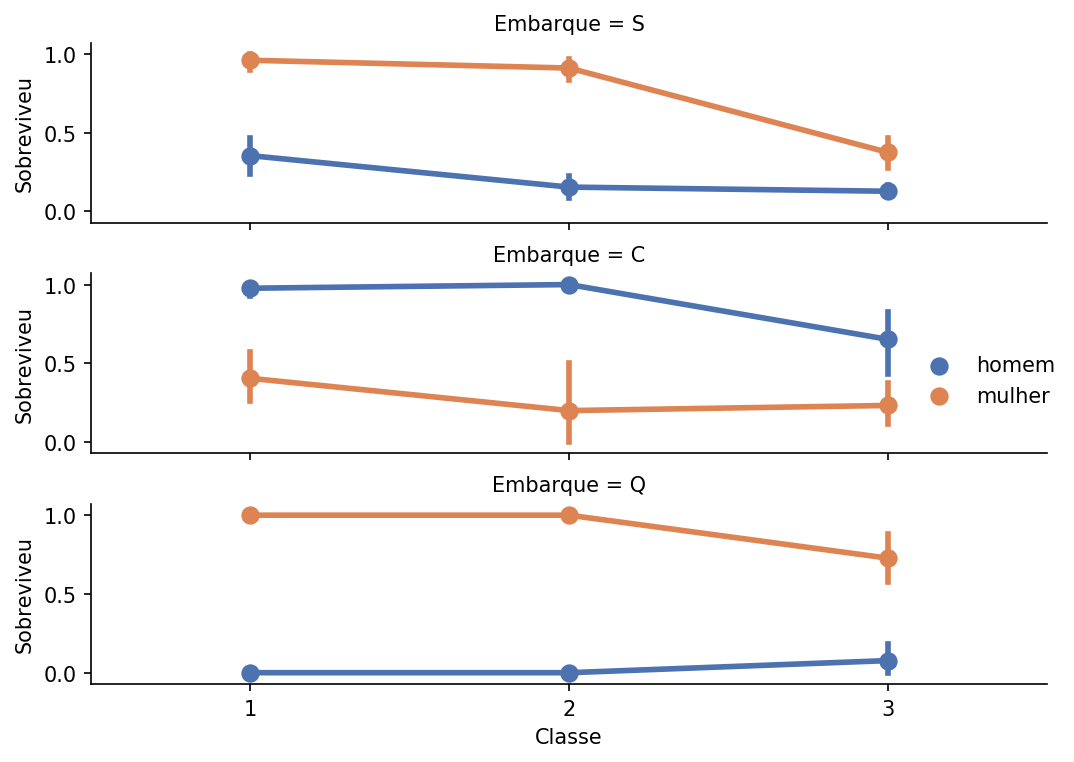

In [37]:
g = sns.FacetGrid(df, row='Embarque', size=3, aspect=1.6)
g.map(sns.pointplot, 'Classe', 'Sobreviveu', 'Sexo', palette='deep')
g.add_legend()

fig = plt.gcf()
fig.set_size_inches(7,5)
fig.set_dpi(150)

plt.tight_layout()
plt.show()

### Agrupar mulheres por sobrevivência

In [38]:
df.loc[df['Sexo']=='mulher'].groupby('Sobreviveu').mean() \
.style.background_gradient(cmap='OrRd')

,Idade,Tarifa,PaisFilhos,Classe,IrmãosConjuge
Sobreviveu,,,,,
0.0,25.046875,23.024385,1.037037,2.851852,1.209877
1.0,28.847716,51.938573,0.515021,1.918455,0.515021


### Agrupar homens por sobrevivência

In [39]:
df.loc[df['Sexo']=='homem'].groupby('Sobreviveu').mean() \
.style.background_gradient(cmap='OrRd')

,Idade,Tarifa,PaisFilhos,Classe,IrmãosConjuge
Sobreviveu,,,,,
0.0,31.618056,21.960993,0.207265,2.476496,0.440171
1.0,27.276022,40.821484,0.357798,2.018349,0.385321


### Gráfico de Barras Sexo x Tarifa por Sexo

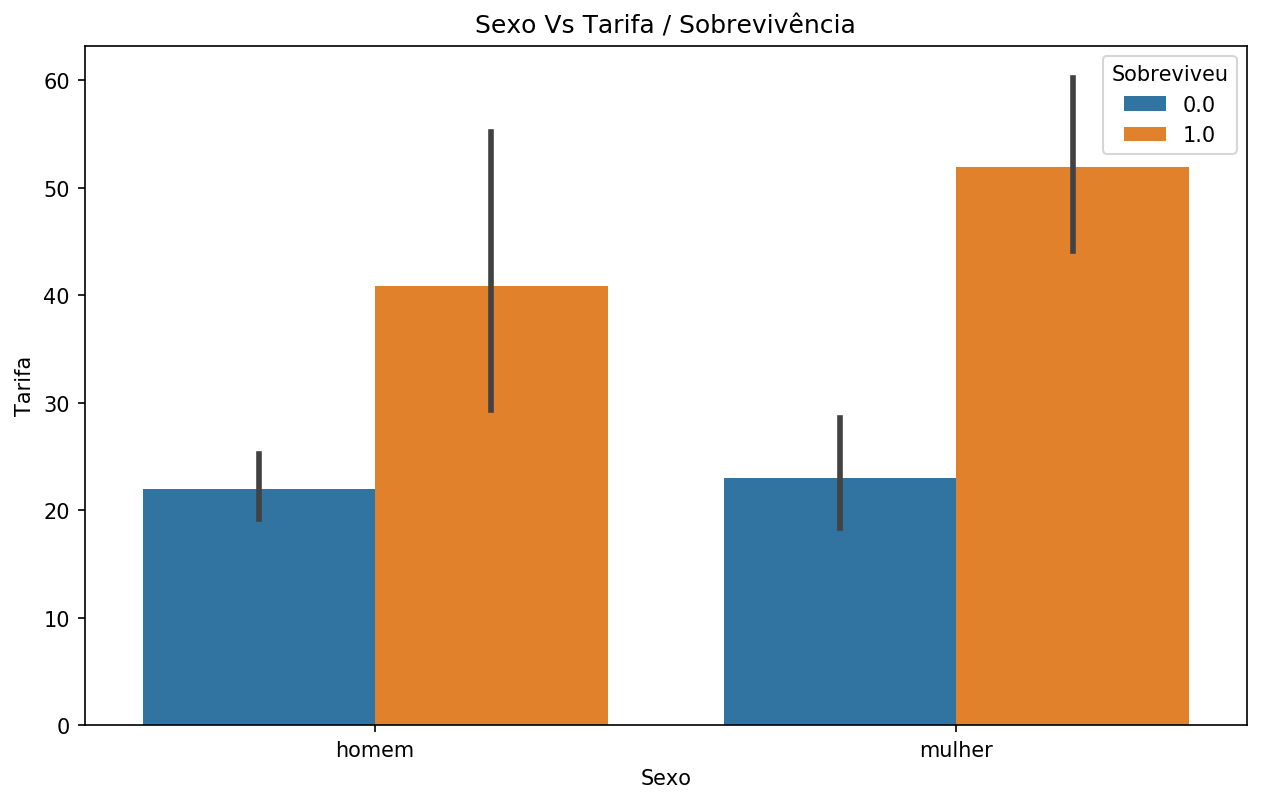

In [40]:
sns.barplot('Sexo', 'Tarifa', hue='Sobreviveu', data=df)
plt.title('Sexo Vs Tarifa / Sobrevivência')

fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)

plt.show()

### Gráfico de Barras Sexo Vs Tarifa / Embarque / Sobreviveu

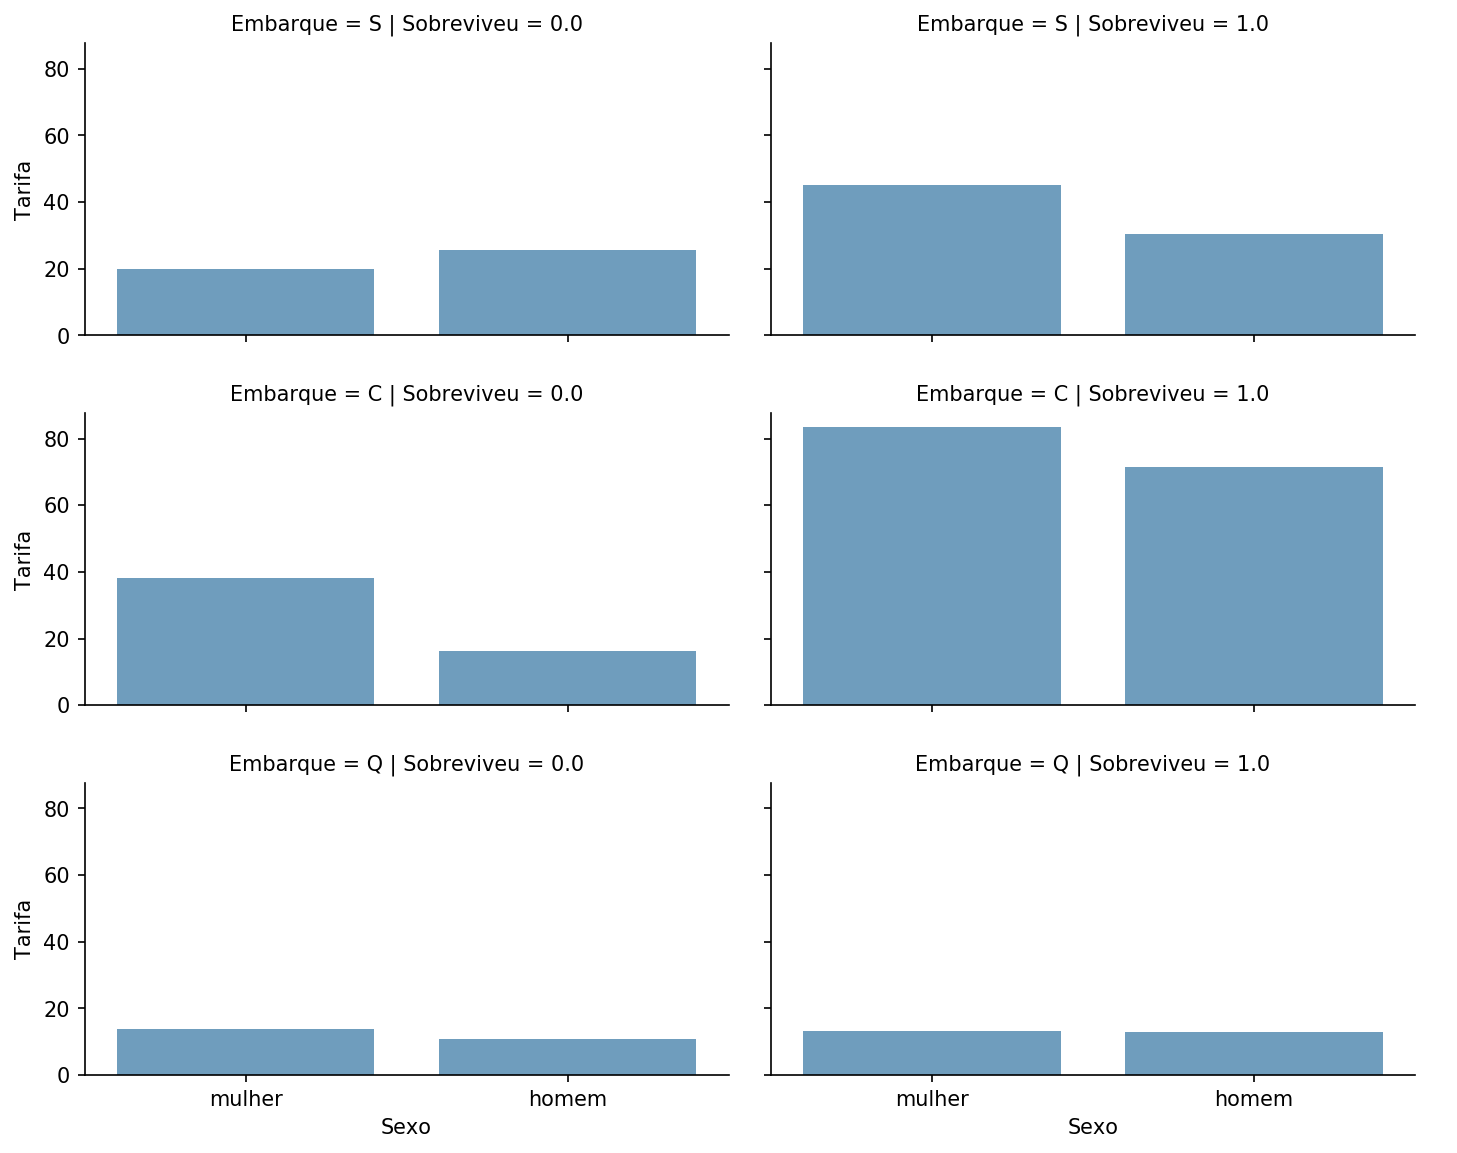

In [41]:
g = sns.FacetGrid(df, row='Embarque', col='Sobreviveu', size=2.2, aspect=1.6)
g.map(sns.barplot, 'Sexo', 'Tarifa', alpha=0.7, ci=None)
g.add_legend()

fig = plt.gcf()
fig.set_size_inches(10,8)
fig.set_dpi(150)

plt.show()

### Crosstab de Sobrevivência / Classe

In [42]:
pd.crosstab(df['Sobreviveu'], df['Classe'],margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.0,80,97,372,549
1.0,136,87,119,342
All,216,184,491,891


## Visualizando dados faltantes

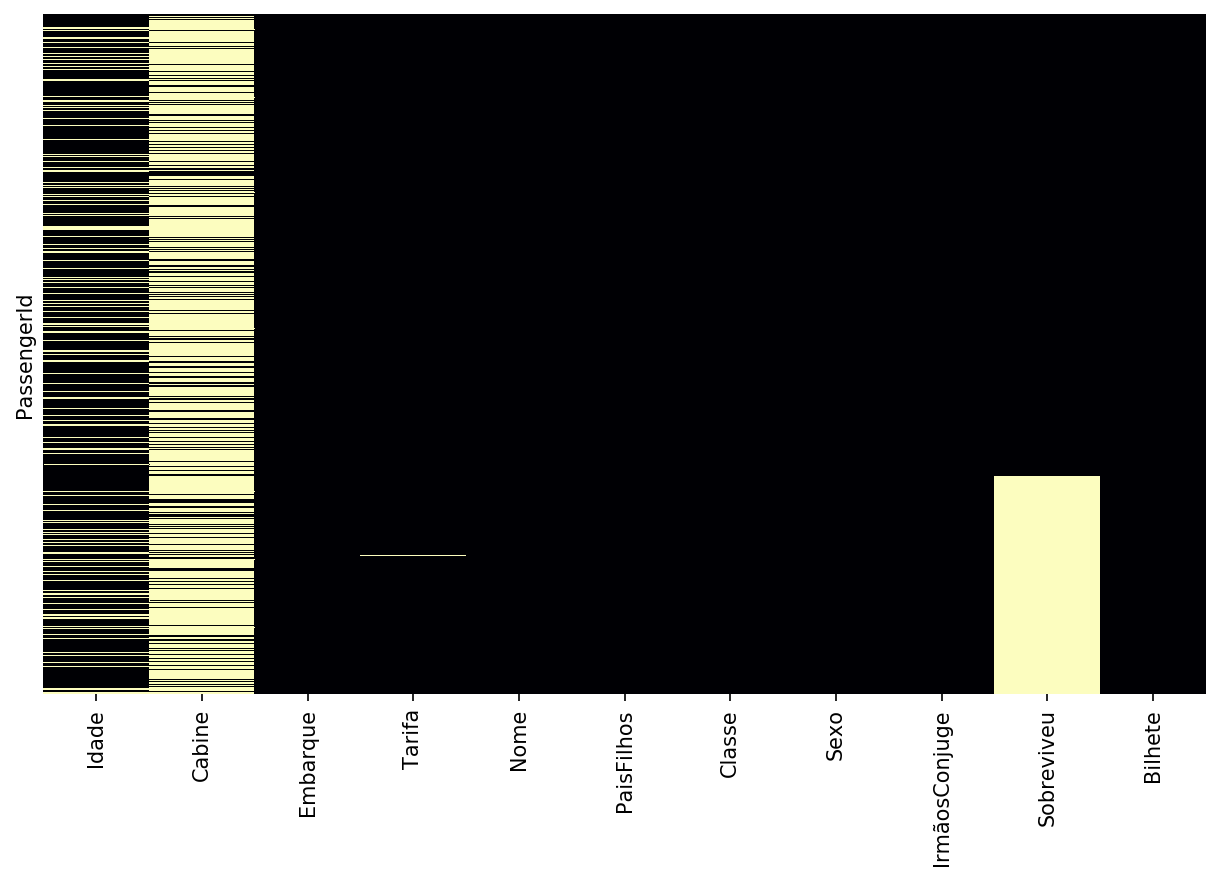

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='magma')

fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)

plt.show()

### Remover Cabine

In [44]:
df.drop(['Cabine'],axis=1, inplace=True)

### Boxplot de Classe por Sexo

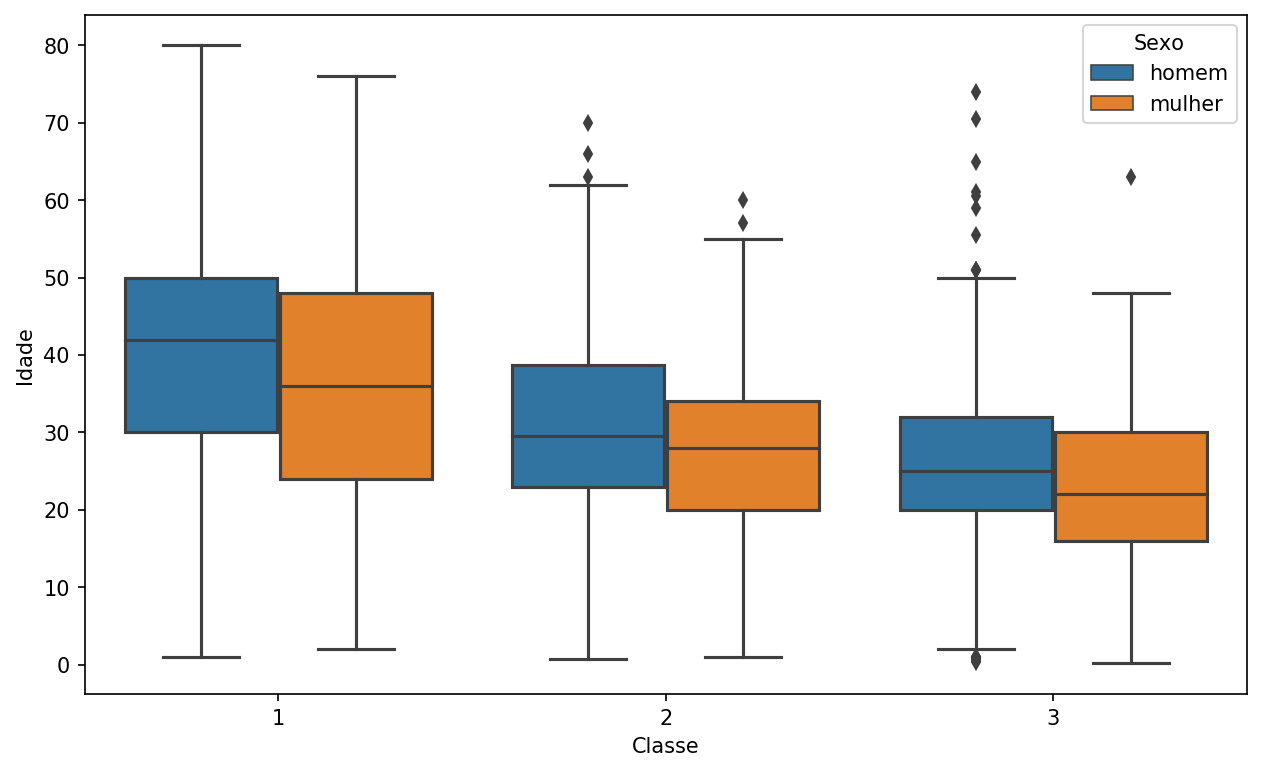

In [45]:
plt.figure(figsize=(10,6), dpi=150)
sns.boxplot(x='Classe',y='Idade',hue='Sexo',data=df)
plt.show()

## Engenharia de Recursos

### Extrair Título do Nome

In [46]:
df['Titulo'] = df['Nome'].str.extract('([a-zA-Z]+)\.')

In [47]:
df['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [48]:
pd.crosstab(df['Titulo'], df['Sexo'])\
.style.background_gradient(cmap='OrRd')

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [49]:
df['Titulo'] = df['Titulo'].apply(lambda x: 'Outros' if x not in ['Mr', 'Mrs', 'Miss', 'Master'] else x)

pd.crosstab(df['Titulo'], df['Sexo'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sexo,homem,mulher,All
Titulo,,,
Master,61,0,61
Miss,0,260,260
Mr,757,0,757
Mrs,0,197,197
Outros,25,9,34
All,843,466,1309


In [50]:
df.loc[df['Titulo']=='Master'].mean()

Idade             5.482642
Tarifa           36.008195
PaisFilhos        1.377049
Classe            2.655738
IrmãosConjuge     2.049180
Sobreviveu        0.575000
dtype: float64

### Traduzir "Títulos"

In [51]:
df['Titulo']=df['Titulo'].map({'Master':'Menino',
                              'Miss':'Solteira',
                              'Mr':'Adulto',
                              'Mrs':'Casada',
                              'Outros':'Outros'})

## Mulheres e Crianças sobreviveram ou morreram juntos?
### Extrair sobrenome para identificar possíveis famílias

In [52]:
df['Sobrenome'] = df['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [53]:
df.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
             ..
Moutal        1
Moussa        1
Moss          1
Morrow        1
Abbing        1
Name: Nome, Length: 875, dtype: int64

In [54]:
df[['Sobreviveu','Titulo','Sobrenome','Bilhete']] \
.loc[df['Sobrenome']=='Andersson'] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


In [55]:
df[['Sobreviveu','Titulo','Sobrenome','Bilhete']] \
.loc[df['Sobrenome']=='Sage'] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


In [56]:
df[['Sobreviveu','Titulo','Sobrenome','Bilhete']] \
.loc[df['Sobrenome']=='Brown'] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [57]:
df.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Titulo'].unique()

array(['Casada', 'Solteira', 'Menino', 'Outros'], dtype=object)

### Criar Feature "TamanhoGrupo"

Referente à quantidade de Pessoas que possuem o mesmo sobrenome

In [58]:
df.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')] \
.loc[df['Sobrenome']=='Andersson']['Sobrenome'].count()

8

In [59]:
def count_group(df, x):
    return df.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')].loc[df['Sobrenome']==x]['Sobreviveu'].count()

df['TamanhoGrupo'] = df['Sobrenome'].apply(lambda x: count_group(df,x))

In [60]:
def remove_men(df, feat):
    for idx, _ in df.iterrows():
        if df['Titulo'].at[idx] == 'Adulto':
            df[feat].at[idx] = 0

In [61]:
remove_men(df, 'TamanhoGrupo')

In [62]:
df[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']] \
.sort_values(by='TamanhoGrupo', ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
814,7,Andersson,Solteira,0.0
1106,7,Andersson,Solteira,NaN
69,7,Andersson,Solteira,1.0
120,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
542,7,Andersson,Solteira,0.0
611,7,Andersson,Casada,0.0
851,7,Andersson,Menino,0.0
172,5,Rice,Menino,0.0


### Criar Recurso "SobrevivenciaGrupo"

In [63]:
def mean_surv_group(df, x):
    return df[['Titulo','Sobreviveu']].loc[df['Sobrenome']==x] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')].mean()['Sobreviveu']

df['SobrevivenciaGrupo'] = df['Sobrenome'].apply(lambda x: mean_surv_group(df,x))

In [64]:
remove_men(df, 'SobrevivenciaGrupo')

In [65]:
df['SobrevivenciaGrupo'].isnull().sum()

119

In [66]:
df['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [67]:
df[['SobrevivenciaGrupo','Sobrenome','Titulo','Sobreviveu']] \
.sort_values(by='SobrevivenciaGrupo', ascending=False).head(10)

,SobrevivenciaGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1309,1.0,Peter,Menino,NaN
1112,1.0,Duran y More,Solteira,NaN
586,1.0,Taussig,Solteira,1.0
301,1.0,Kelly,Solteira,1.0
300,1.0,Baxter,Casada,1.0
1098,1.0,McGowan,Solteira,NaN
292,1.0,Bishop,Casada,1.0
291,1.0,Barber,Solteira,1.0
290,1.0,Connolly,Solteira,1.0


In [68]:
df['SobrevivenciaGrupo'].isnull().sum()

0

### Grupos de Mulheres e Crianças que morreram juntos

In [69]:
df[['Sobrenome', 'Titulo']] \
.loc[(df['SobrevivenciaGrupo']==0) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de pessoas (morreram)

In [70]:
df[['Sobrenome', 'Titulo','Sobreviveu']] \
.loc[(df['SobrevivenciaGrupo']==0) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

50

### Grupos de Mulheres e Crianças que sobreviveram juntos

In [71]:
df[['Sobrenome', 'Titulo']] \
.loc[(df['SobrevivenciaGrupo']==1) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de pessoas (sobreviveram)

In [72]:
df[['Sobrenome', 'Titulo','Sobreviveu']] \
.loc[(df['SobrevivenciaGrupo']==1) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

74

### Grupos de Mulheres e Crianças com sobrevivência mista

In [73]:
df[['Sobrenome', 'Titulo']] \
.loc[(df['SobrevivenciaGrupo']>0) & (df['SobrevivenciaGrupo']<1) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de pessoas (sobrevivência mista)

In [74]:
df[['Sobrenome', 'Titulo','Sobreviveu']] \
.loc[(df['SobrevivenciaGrupo']>0) & (df['SobrevivenciaGrupo']<1) & (df['TamanhoGrupo']>1)] \
.loc[(df['Sexo']=='mulher') | (df['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso "ExpectativaDeVida"

In [75]:
df['ExpectativaDeVida'] = ''
for idx, _ in df.iterrows():
    if (df['SobrevivenciaGrupo'].at[idx]==0)\
    & (df['TamanhoGrupo'].at[idx]>1):
        df['ExpectativaDeVida'].at[idx] = 'morrer'
        
    elif(df['SobrevivenciaGrupo'].at[idx]==1)\
    & (df['TamanhoGrupo'].at[idx]>1):
        df['ExpectativaDeVida'].at[idx] = 'viver'
    
    else:
        df['ExpectativaDeVida'].at[idx] = 'desconhecida'

In [76]:
pd.crosstab(df['ExpectativaDeVida'], df['Sobreviveu'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sobreviveu,0.0,1.0,All
ExpectativaDeVida,,,
desconhecida,498,268,766
morrer,50,0,50
viver,1,74,75
All,549,342,891


In [77]:
score = pd.crosstab(df['ExpectativaDeVida'], df['Sobreviveu'], margins=True).values
acertos_morrer = score[1][0]/score[3][0]
acertos_viver = score[2][1]/score[3][1]
print(f'Morrer = {round(acertos_morrer*100,2)}%\n Viver = {round(acertos_viver*100,2)}%')

Morrer = 9.11%
 Viver = 21.64%


### Considerando que bilhetes iguais indicam mesma cabine, foi criado o recurso Grupo cabine

#### Indice de sobrevivência por Grupo de Bilhete

In [78]:
df['GrupoBilhete'] = df['Bilhete'].apply(lambda x: x.split(' ')[-1])

In [79]:
df['TamanhoGrupoBilhete'] = ''
grp_count = df.groupby('GrupoBilhete')['GrupoBilhete'].count().sort_values(ascending=False)
for idx, count in enumerate(grp_count):
    df['TamanhoGrupoBilhete'].loc[df['GrupoBilhete']==grp_count.index[idx]]=grp_count[idx]

In [80]:
df.groupby('TamanhoGrupoBilhete')['Sobreviveu'].mean().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 11], dtype='int64', name='TamanhoGrupoBilhete')

In [81]:
grp_mean = df.groupby('TamanhoGrupoBilhete')['Sobreviveu'].mean()
for i in grp_mean.index:
    print(i, grp_mean[i])

1 0.2647058823529412
2 0.5136612021857924
3 0.6666666666666666
4 0.717391304347826
5 0.3333333333333333
6 0.21052631578947367
7 0.20833333333333334
8 0.38461538461538464
11 0.0


In [82]:
df['SobrevivenciaGrupoBilhete'] = ''
grp_mean = df.groupby('TamanhoGrupoBilhete')['Sobreviveu'].mean()
for idx in grp_mean.index:
    df['SobrevivenciaGrupoBilhete'].loc[df['TamanhoGrupoBilhete']==idx]=grp_mean[idx]

In [83]:
df[['GrupoBilhete','SobrevivenciaGrupoBilhete','TamanhoGrupoBilhete','TamanhoGrupo','SobrevivenciaGrupo','Sobrenome','Sobreviveu']]\
.sort_values(by='TamanhoGrupoBilhete', ascending=False).head(10)

,GrupoBilhete,SobrevivenciaGrupoBilhete,TamanhoGrupoBilhete,TamanhoGrupo,SobrevivenciaGrupo,Sobrenome,Sobreviveu
PassengerId,,,,,,,
181,2343,0,11,4,0.0,Sage,0.0
1234,2343,0,11,0,0.0,Sage,NaN
325,2343,0,11,0,0.0,Sage,0.0
1080,2343,0,11,4,0.0,Sage,NaN
793,2343,0,11,4,0.0,Sage,0.0
864,2343,0,11,4,0.0,Sage,0.0
202,2343,0,11,0,0.0,Sage,0.0
847,2343,0,11,0,0.0,Sage,0.0
1252,2343,0,11,4,0.0,Sage,NaN


In [84]:
for idx, _ in df.iterrows():
    if (df['SobrevivenciaGrupo'].at[idx]==0)\
    & (df['TamanhoGrupo'].at[idx]>1)\
    |  (df['SobrevivenciaGrupoBilhete'].at[idx]<0.6)\
    & (df['Titulo'].at[idx]=='Adulto'):
        df['ExpectativaDeVida'].at[idx] = 'morrer'
        
    elif(df['SobrevivenciaGrupo'].at[idx]==1)\
    & (df['TamanhoGrupo'].at[idx]>1)\
    | (df['SobrevivenciaGrupoBilhete'].at[idx]>0.2)\
    & (df['Sexo'].at[idx]=='mulher'):
        df['ExpectativaDeVida'].at[idx] = 'viver'
    
    else:
        df['ExpectativaDeVida'].at[idx] = 'desconhecida'

In [85]:
pd.crosstab(df['ExpectativaDeVida'], df['Sobreviveu'], margins=True)\
.style.background_gradient(cmap='OrRd')

Sobreviveu,0.0,1.0,All
ExpectativaDeVida,,,
desconhecida,54,24,78
morrer,448,70,518
viver,47,248,295
All,549,342,891


In [86]:
score = pd.crosstab(df['ExpectativaDeVida'], df['Sobreviveu'], margins=True).values
acertos_morrer = score[1][0]/score[3][0]
acertos_viver = score[2][1]/score[3][1]
print(f'Morrer = {round(acertos_morrer*100,2)}%\n Viver = {round(acertos_viver*100,2)}%')

Morrer = 81.6%
 Viver = 72.51%


In [87]:
acertos = (score[1][0]+score[2][1]) / score[3][2]
print(f'Indice de acertos = {round(acertos*100,2)}%')

Indice de acertos = 78.11%


### Remover colunas desnecessárias

In [88]:
df.isnull().sum()

Idade                        263
Embarque                       0
Tarifa                         1
Nome                           0
PaisFilhos                     0
Classe                         0
Sexo                           0
IrmãosConjuge                  0
Sobreviveu                   418
Bilhete                        0
Titulo                         0
Sobrenome                      0
TamanhoGrupo                   0
SobrevivenciaGrupo             0
ExpectativaDeVida              0
GrupoBilhete                   0
TamanhoGrupoBilhete            0
SobrevivenciaGrupoBilhete      0
dtype: int64

In [89]:
df.drop(['Nome', 'Bilhete','Sobrenome','GrupoBilhete'],axis=1,inplace=True)

### Variáveis Dummy

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      1046 non-null   float64
 1   Embarque                   1309 non-null   object 
 2   Tarifa                     1308 non-null   float64
 3   PaisFilhos                 1309 non-null   int64  
 4   Classe                     1309 non-null   int64  
 5   Sexo                       1309 non-null   object 
 6   IrmãosConjuge              1309 non-null   int64  
 7   Sobreviveu                 891 non-null    float64
 8   Titulo                     1309 non-null   object 
 9   TamanhoGrupo               1309 non-null   int64  
 10  SobrevivenciaGrupo         1309 non-null   float64
 11  ExpectativaDeVida          1309 non-null   object 
 12  TamanhoGrupoBilhete        1309 non-null   object 
 13  SobrevivenciaGrupoBilhete  1309 non-null   objec

In [91]:
df['TamanhoGrupoBilhete'] = df['TamanhoGrupoBilhete'].astype(int)
df['SobrevivenciaGrupoBilhete'] = df['SobrevivenciaGrupoBilhete'].astype(float)

In [92]:
df.describe(include=['O'])

,Embarque,Sexo,Titulo,ExpectativaDeVida
count,1309,1309,1309,1309
unique,3,2,5,3
top,S,homem,Adulto,morrer
freq,916,843,757,748


In [93]:
df = pd.get_dummies(df, columns=['Embarque',
                                 'Sexo',
                                 'Titulo',
                                 'Classe',
                                 'ExpectativaDeVida',
                                 'TamanhoGrupoBilhete'], drop_first=True)
df.head()

,Idade,Tarifa,PaisFilhos,IrmãosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,SobrevivenciaGrupoBilhete,Embarque_Q,Embarque_S,...,ExpectativaDeVida_morrer,ExpectativaDeVida_viver,TamanhoGrupoBilhete_2,TamanhoGrupoBilhete_3,TamanhoGrupoBilhete_4,TamanhoGrupoBilhete_5,TamanhoGrupoBilhete_6,TamanhoGrupoBilhete_7,TamanhoGrupoBilhete_8,TamanhoGrupoBilhete_11
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,0,1,0.0,0,0.0,0.264706,0,1,...,1,0,0,0,0,0,0,0,0,0
2,38.0,71.2833,0,1,1.0,1,1.0,0.513661,0,0,...,0,1,1,0,0,0,0,0,0,0
3,26.0,7.9250,0,0,1.0,1,1.0,0.264706,0,1,...,0,1,0,0,0,0,0,0,0,0
4,35.0,53.1000,0,1,1.0,1,1.0,0.513661,0,1,...,0,1,1,0,0,0,0,0,0,0
5,35.0,8.0500,0,0,0.0,0,0.0,0.264706,0,1,...,1,0,0,0,0,0,0,0,0,0


In [94]:
df.columns

Index(['Idade', 'Tarifa', 'PaisFilhos', 'IrmãosConjuge', 'Sobreviveu',
       'TamanhoGrupo', 'SobrevivenciaGrupo', 'SobrevivenciaGrupoBilhete',
       'Embarque_Q', 'Embarque_S', 'Sexo_mulher', 'Titulo_Casada',
       'Titulo_Menino', 'Titulo_Outros', 'Titulo_Solteira', 'Classe_2',
       'Classe_3', 'ExpectativaDeVida_morrer', 'ExpectativaDeVida_viver',
       'TamanhoGrupoBilhete_2', 'TamanhoGrupoBilhete_3',
       'TamanhoGrupoBilhete_4', 'TamanhoGrupoBilhete_5',
       'TamanhoGrupoBilhete_6', 'TamanhoGrupoBilhete_7',
       'TamanhoGrupoBilhete_8', 'TamanhoGrupoBilhete_11'],
      dtype='object')

In [95]:
df.shape

(1309, 27)

### Usar Predição da Idade

In [96]:
idade = pd.read_csv('CSVs/titanic/idade_comleta.csv')
idade.set_index('IdPassageiro', inplace=True)
idade.columns=['IdadeCompleta']
idade.head()

,IdadeCompleta
IdPassageiro,
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0


In [97]:
df = pd.concat([df, idade],axis=1)

In [98]:
df.drop('Idade', axis=1, inplace=True)
df.shape

(1309, 27)

In [99]:
df.head()

,Tarifa,PaisFilhos,IrmãosConjuge,Sobreviveu,TamanhoGrupo,SobrevivenciaGrupo,SobrevivenciaGrupoBilhete,Embarque_Q,Embarque_S,Sexo_mulher,...,ExpectativaDeVida_viver,TamanhoGrupoBilhete_2,TamanhoGrupoBilhete_3,TamanhoGrupoBilhete_4,TamanhoGrupoBilhete_5,TamanhoGrupoBilhete_6,TamanhoGrupoBilhete_7,TamanhoGrupoBilhete_8,TamanhoGrupoBilhete_11,IdadeCompleta
1,7.2500,0,1,0.0,0,0.0,0.264706,0,1,0,...,0,0,0,0,0,0,0,0,0,22.0
2,71.2833,0,1,1.0,1,1.0,0.513661,0,0,1,...,1,1,0,0,0,0,0,0,0,38.0
3,7.9250,0,0,1.0,1,1.0,0.264706,0,1,1,...,1,0,0,0,0,0,0,0,0,26.0
4,53.1000,0,1,1.0,1,1.0,0.513661,0,1,1,...,1,1,0,0,0,0,0,0,0,35.0
5,8.0500,0,0,0.0,0,0.0,0.264706,0,1,0,...,0,0,0,0,0,0,0,0,0,35.0


### Preencher Tarifa Faltando com a média

In [100]:
df['Tarifa'].fillna(df['Tarifa'].mean(), inplace=True)

In [101]:
df.isnull().sum()

Tarifa                         0
PaisFilhos                     0
IrmãosConjuge                  0
Sobreviveu                   418
TamanhoGrupo                   0
SobrevivenciaGrupo             0
SobrevivenciaGrupoBilhete      0
Embarque_Q                     0
Embarque_S                     0
Sexo_mulher                    0
Titulo_Casada                  0
Titulo_Menino                  0
Titulo_Outros                  0
Titulo_Solteira                0
Classe_2                       0
Classe_3                       0
ExpectativaDeVida_morrer       0
ExpectativaDeVida_viver        0
TamanhoGrupoBilhete_2          0
TamanhoGrupoBilhete_3          0
TamanhoGrupoBilhete_4          0
TamanhoGrupoBilhete_5          0
TamanhoGrupoBilhete_6          0
TamanhoGrupoBilhete_7          0
TamanhoGrupoBilhete_8          0
TamanhoGrupoBilhete_11         0
IdadeCompleta                  0
dtype: int64

### Criar Faixa Etátia

In [102]:
df['FaixaEtaria'] = pd.cut(df['IdadeCompleta'].astype(int), bins=5)
pd.crosstab(df['FaixaEtaria'], df['Sobreviveu'])

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-1.081, 15.2]",44,52
"(15.2, 31.4]",294,157
"(31.4, 47.6]",159,96
"(47.6, 63.8]",40,36
"(63.8, 80.0]",12,1


In [103]:
df = pd.get_dummies(df, columns=['FaixaEtaria'], drop_first=True)
df.shape

(1309, 31)

In [104]:
df['Familiares'] = df['IrmãosConjuge']+df['PaisFilhos']

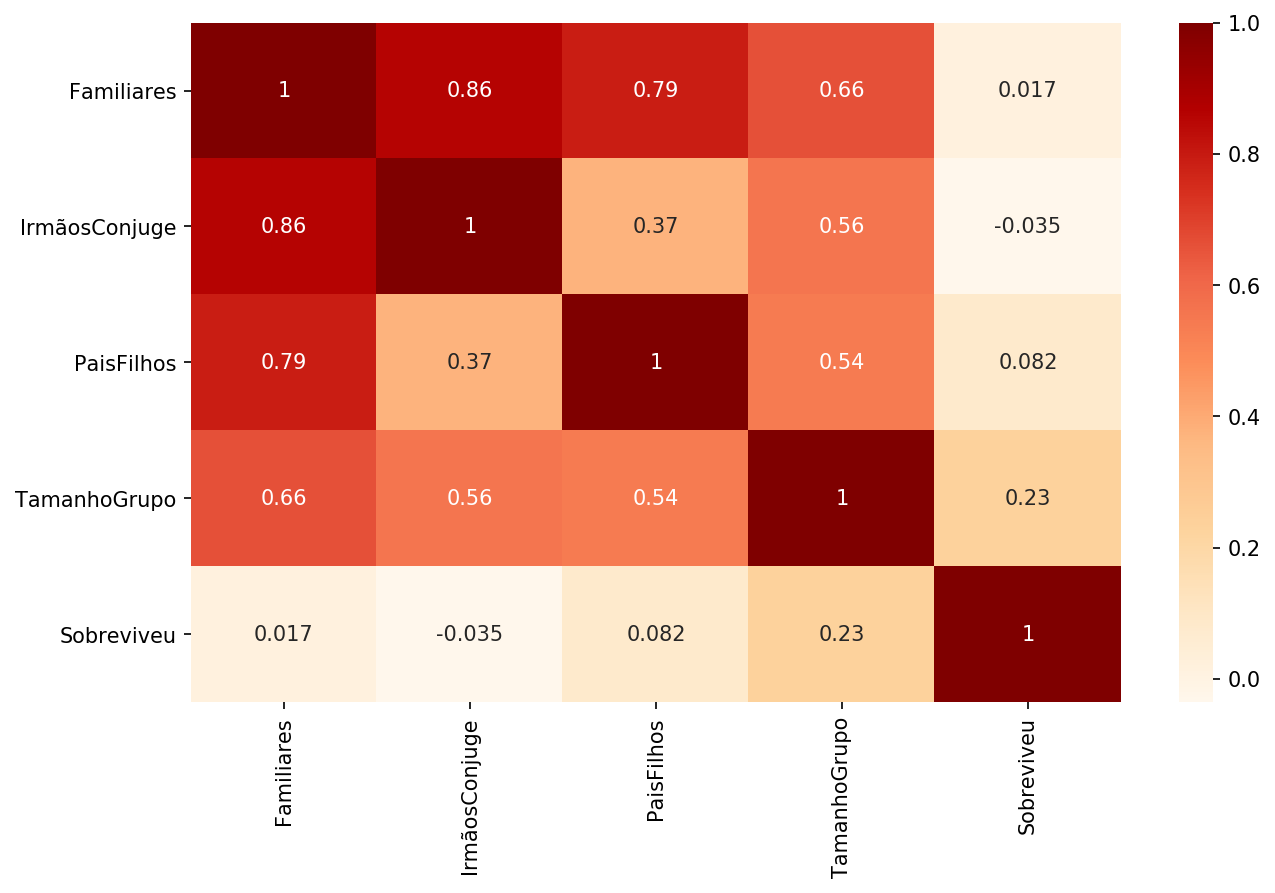

In [105]:
sns.heatmap(df[['Familiares','IrmãosConjuge','PaisFilhos','TamanhoGrupo','Sobreviveu']].corr(),
            annot=True, cmap='OrRd')

fig = plt.gcf()
fig.set_size_inches(10,6)
fig.set_dpi(150)

plt.show()

In [106]:
df['Sozinho'] = (df['Familiares']==0).map({True:1,False:0})
df['Sozinho']

1       0
2       0
3       1
4       0
5       1
       ..
1305    1
1306    1
1307    1
1308    1
1309    0
Name: Sozinho, Length: 1309, dtype: int64

### Atualizar Train e Test

In [107]:
train = df.loc[train.index]
test = df.loc[test.index]
train.shape, test.shape

((891, 33), (418, 33))

In [108]:
test.drop('Sobreviveu', axis=1, inplace=True)
test.shape

(418, 32)

### Treinar o modelo

In [109]:
X = train.drop('Sobreviveu',axis=1)
y = train['Sobreviveu']
X.shape, y.shape

((891, 32), (891,))

### Separar os dados em treino e teste

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [112]:
X_train.shape, y_train.shape

((623, 32), (623,))

In [113]:
X_test.shape, y_test.shape

((268, 32), (268,))

## Machine Learning
### Importando Modelos Preditivos

In [114]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed:int=123, params:bool=None):
        if params:
            params['random_state']=seed
            self.clf = clf(**params)
            
        else:
            self.clf = clf()
            
    def predict(self, X:pd.Series)->np.array:
        return self.clf.predict(X)
    
    def fit(self, X:pd.Series, y:pd.Series):
        return self.clf.fit(X,y)
    
    def feature_importances(self, X:pd.Series, y:pd.Series)->list:
        return self.clf.fit(X,y).feature_importances_
    
    def score(self, X:pd.Series, y:pd.Series)->float:
        return self.clf.score(X,y)

In [116]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [117]:
resultados = []
for model in modelos:
    x = ModeloAuxiliar(clf=model['modelo'])
    x.fit(X_train, y_train)
    x_pred = x.predict(X_test)
    acuracidade = round(x.score(X_test, y_test)*100, 2)
    resultados.append({'nome': model['nome'],
                       'score': acuracidade,
                        'pred': x_pred})

In [118]:
models = pd.DataFrame(resultados)

In [119]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
2,gradboost,91.04
8,LinearSVC,90.67
3,adaboost,90.30
0,logreg,89.93
11,RForest,88.06
9,SGD,85.07
1,etree,83.96
10,Dtree,82.46
6,GaussianNB,79.10
5,KNN,75.75


### Validação Cruzada (Cross-Validation)

In [120]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [121]:
kfold = KFold(n_splits=10, random_state=123)

In [122]:
ada = AdaBoostClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [123]:
resultado_ada = cross_val_score(ada,X_train,y_train, cv=kfold, scoring='accuracy')

print(f'O score cross-validado do AdaBoost = {resultado_ada.mean()}')

O score cross-validado do AdaBoost = 0.8891705069124425


In [124]:
grad = GradientBoostingClassifier(n_estimators=200, random_state=123, learning_rate=0.1)

In [125]:
resultado_grad = cross_val_score(grad,X_train,y_train, cv=kfold, scoring='accuracy')

print(f'O score cross-validado do AdaBoost = {resultado_grad.mean()}')

O score cross-validado do AdaBoost = 0.868305171530978


In [126]:
linear_svc = LinearSVC(random_state=123)
resultado_linear_svc = cross_val_score(linear_svc,X_train,y_train, cv=kfold, scoring='accuracy')

print(f'O score cross-validado do AdaBoost = {resultado_linear_svc.mean()}')

O score cross-validado do AdaBoost = 0.8811571940604198


In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=200, random_state=123)

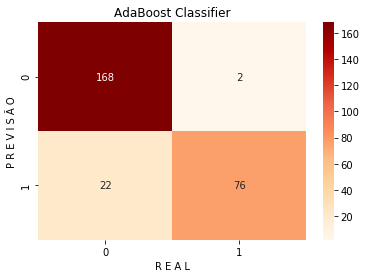

In [129]:
sns.heatmap(confusion_matrix(y_test, ada.predict(X_test)), cmap='OrRd',annot=True, fmt='2.0f')
plt.title('AdaBoost Classifier')
plt.ylabel('P R E V I S Ã O')
plt.xlabel('R E A L')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**
    
    
<br>

<br>$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$<br>

<br>$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$<br>

<br>$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$<br>

<br>$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

In [130]:
from sklearn.metrics import (recall_score,
                             accuracy_score,
                             precision_score,
                             f1_score)

In [131]:
ada_pred = ada.predict(X_test)

### Revocação

In [132]:
recall_score(y_test, ada_pred)

0.7755102040816326

### Acuracidade

In [133]:
accuracy_score(y_test,ada_pred)

0.9104477611940298

### Precisão

In [134]:
precision_score(y_test,ada_pred)

0.9743589743589743

### F1-Score

In [135]:
f1_score(y_test,ada_pred)

0.8636363636363635

## Curvas ROC e AUC 
O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

In [136]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC = 0.5
AdaBoost: ROC AUC = 0.941


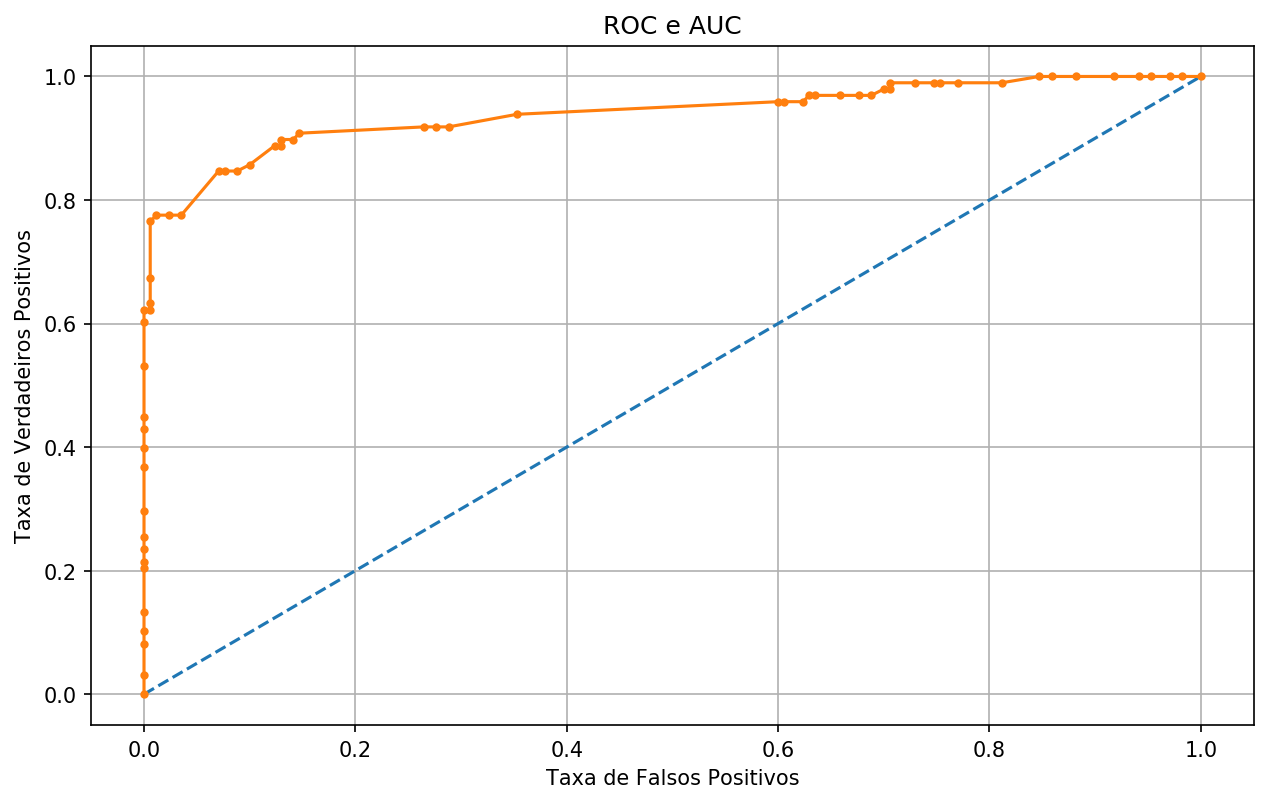

In [137]:
ns_probs = [0 for _ in range(len(y_test))]
ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

ada_auc = roc_auc_score(y_test, ada_probs)

print(f'Sem habilidade: ROC AUC = {ns_auc.round(3)}')
print(f'AdaBoost: ROC AUC = {ada_auc.round(3)}')

ns_tfp, ns_tvp, _ = roc_curve(y_test, ns_probs)
ada_tfp, ada_tvp, _ = roc_curve(y_test, ada_probs)

plt.figure(figsize=(10,6), dpi=150)
plt.plot(ns_tfp, ns_tvp, linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp, ada_tvp, marker='.', label='AdaBoost')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')

plt.title('ROC e AUC')
plt.grid()
plt.show()

### Selecionando Threshold (Limite)

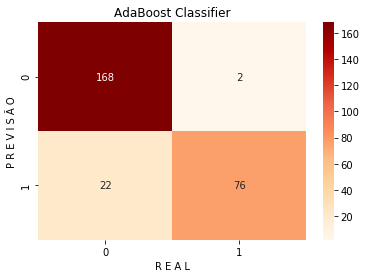

In [138]:
pred_proba = pd.Series(ada_probs >= 0.5).map({False:0, True:1}).values

sns.heatmap(confusion_matrix(y_test, pred_proba),
            cmap='OrRd', annot=True, fmt='2.0f')
plt.title('AdaBoost Classifier')
plt.ylabel('P R E V I S Ã O')
plt.xlabel('R E A L')
plt.show()

### Customização de Hyper-Parâmetros

In [139]:
from sklearn.model_selection import GridSearchCV

#### Random Forest

In [140]:
rf_params = {
    'n_estimators':[100,200,300],
    'max_depth':[2,4,6],
    'min_samples_leaf': [1,2,3,4,5]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),
                 param_grid=rf_params, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  1.2min finished


0.8876903225806452
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)


In [141]:
gd_pred = gd.predict(X_test)
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

## Ensembling
### Classificação de Votos

In [142]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                  ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                  ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                  ('LR',LogisticRegression(C=0.05)),
                  ('DT',DecisionTreeClassifier(random_state=123)),
                  ('NB',GaussianNB()),
                  ('svm',SVC(kernel='linear',probability=True))
                 ]

In [143]:
from sklearn.ensemble import VotingClassifier

cust_ensemble = VotingClassifier(estimators = misturados,
                                voting = 'soft').fit(X_train, y_train)

print(f'Score = {cust_ensemble.score(X_test, y_test)}')

cross = cross_val_score(
    cust_ensemble, X_test, y_test, cv=10, scoring='accuracy')

print(f'Score cross-validado = {cross.mean()}')

Score = 0.8805970149253731
Score cross-validado = 0.8807692307692309


## Ensacamento

In [144]:
from sklearn.ensemble import BaggingClassifier

### KNN

In [145]:
knn = BaggingClassifier(
    base_estimator=KNeighborsClassifier(n_neighbors=3),
    random_state=123, n_estimators=100)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(f'Score = {knn.score(X_test, y_test)}')

cross = cross_val_score(
    knn, X_test, y_test, cv=10, scoring='accuracy')

print(f'Score cross-validado = {cross.mean()}')

Score = 0.7313432835820896
Score cross-validado = 0.7311965811965813


### DecisionTree

In [146]:
dtree = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    random_state=123, n_estimators=100)

dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

print(f'Score = {dtree.score(X_test, y_test)}')

cross = cross_val_score(
    dtree, X_test, y_test, cv=10, scoring='accuracy')

print(f'Score cross-validado = {cross.mean()}')

Score = 0.8880597014925373
Score cross-validado = 0.8809116809116808


### GradientBoosting

In [147]:
grad = GradientBoostingClassifier(
    n_estimators=100,random_state=123,learning_rate=0.1)

grad.fit(X_train, y_train)
grad_pred = grad.predict(X_test)

print(f'Score = {grad.score(X_test, y_test)}')

cross = cross_val_score(
    grad, X_test, y_test, cv=10, scoring='accuracy')

print(f'Score cross-validado = {cross.mean()}')

Score = 0.9104477611940298
Score cross-validado = 0.8660968660968662


### Configurando Hyper-Parâmetros para o AdaBoost

In [148]:
n_estimator = [100,200,300]
learn_rate = [0.05,0.1,0.3,0.5]
hyper = {'n_estimators':n_estimator, 'learning_rate':learn_rate}
gd = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8925032258064517
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   23.5s finished


In [149]:
adaboost_pred = gd.predict(X_test)
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

### Importância de Recursos (Feature Importance)

In [150]:
rf_params = {
    'n_jobs':-1,
    'n_estimators':100,
    'max_depth':2,
    'min_samples_leaf':2,
    'verbose':0
}

rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)
rf_features = rf.feature_importances(X_train, y_train)
rf_features

array([2.35001794e-02, 1.58881871e-03, 3.50288627e-03, 1.74338277e-01,
       2.30134732e-01, 2.16410181e-02, 1.52058676e-04, 5.06575807e-04,
       8.83506570e-02, 3.42471485e-02, 2.71204151e-03, 1.91851692e-04,
       4.24474382e-02, 1.04813573e-03, 1.53645989e-02, 1.60253737e-01,
       1.69067320e-01, 2.11373291e-05, 5.60051609e-03, 1.23663864e-03,
       4.37531247e-04, 8.84059036e-04, 3.14080507e-04, 9.10917268e-04,
       0.00000000e+00, 4.56129647e-03, 1.27486347e-04, 7.41821047e-05,
       4.38850736e-04, 0.00000000e+00, 1.20686023e-02, 4.27722794e-03])

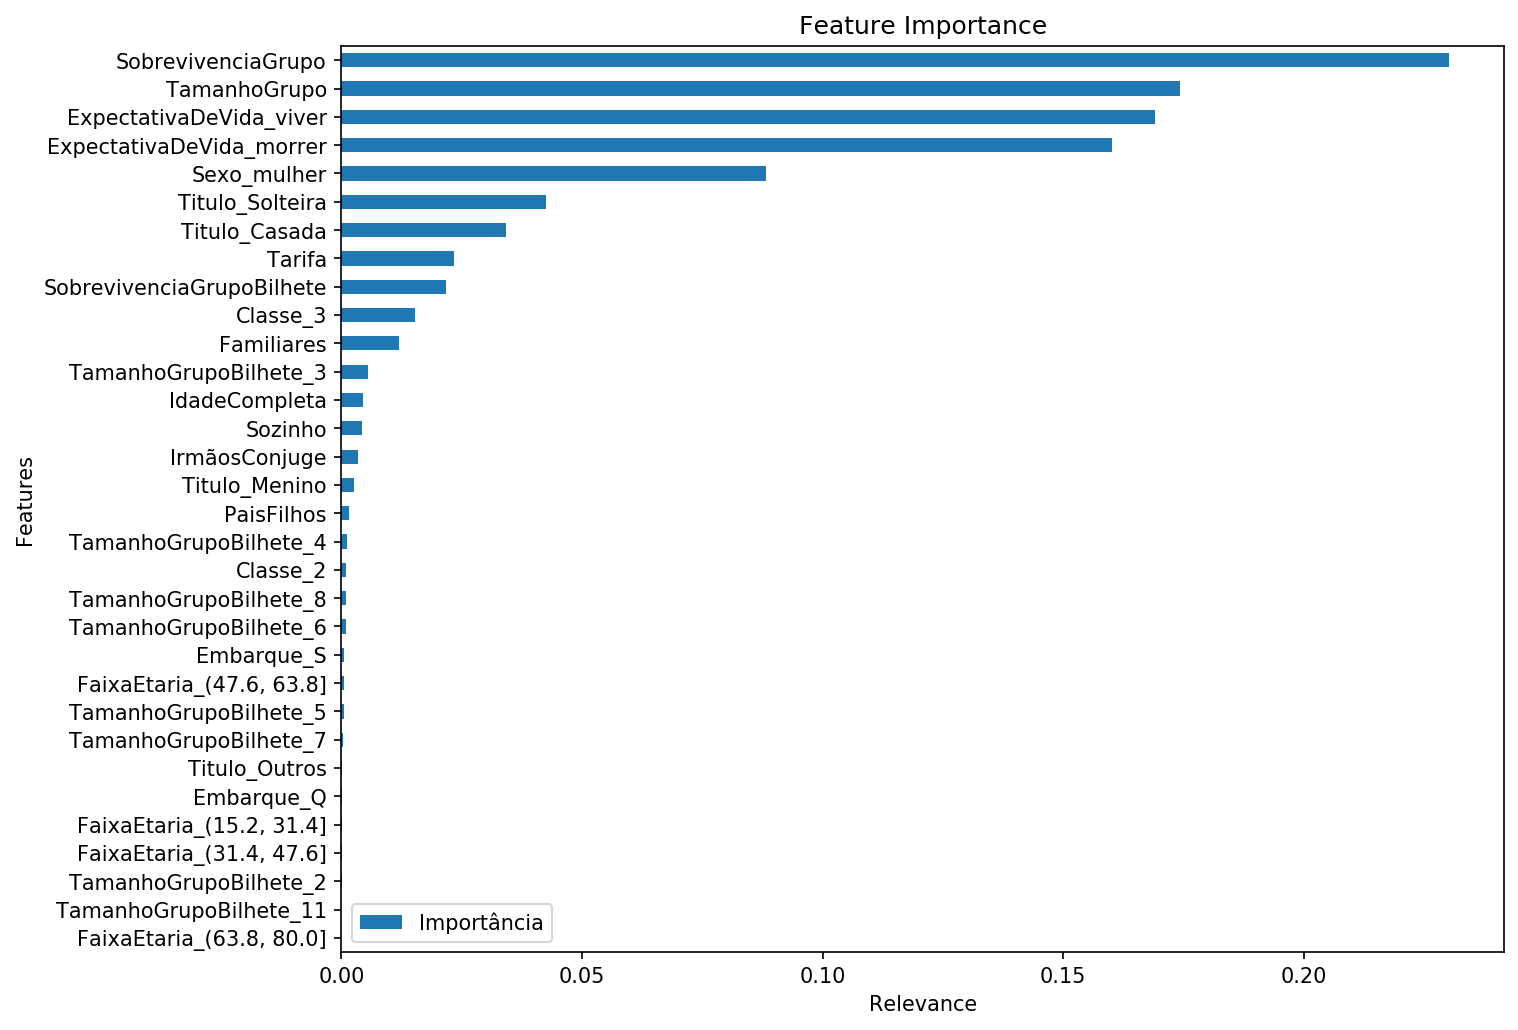

In [151]:
cols = X_train.columns.values

df_features = pd.DataFrame({'recursos':cols,
                           'Importância':rf_features})

df_features.sort_values(by='Importância').plot.barh(x='recursos')
plt.title('Feature Importance')
fig = plt.gcf()
fig.set_size_inches(10,8)
fig.set_dpi(150)
plt.ylabel('Features')
plt.xlabel('Relevance')
plt.show()

In [152]:
recursos = df_features.loc[df_features['Importância']>=0.0003]['recursos'].values
X = X[recursos]

X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)
rf_features = rf.feature_importances(X_train, y_train)
rf_features

array([2.11244596e-02, 3.00651468e-03, 2.76965812e-03, 1.42517655e-01,
       2.66203463e-01, 3.40703654e-02, 3.14837577e-03, 1.24772390e-01,
       7.68026877e-03, 6.58859767e-04, 2.93232203e-02, 3.07787274e-04,
       1.69559084e-02, 1.48418037e-01, 1.72881612e-01, 3.03957273e-03,
       4.15093130e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.12827215e-03, 7.73209642e-03, 2.39457847e-04, 2.45374922e-03,
       7.41734568e-03])

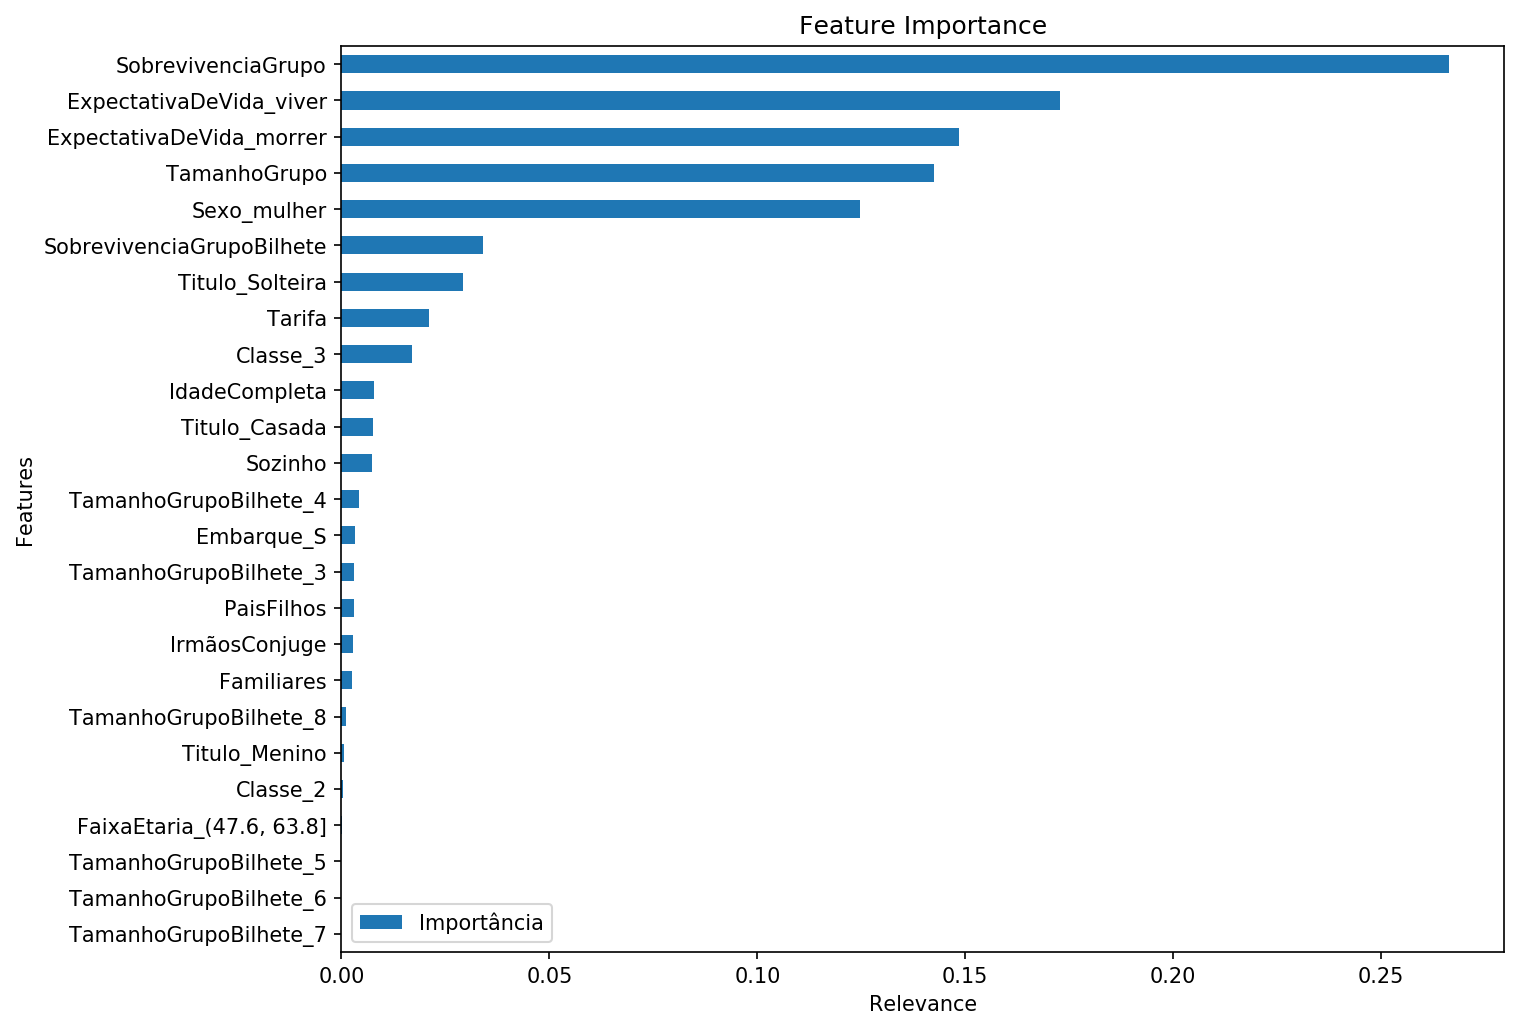

In [153]:
cols = X_train.columns.values

df_features = pd.DataFrame({'recursos':cols,
                           'Importância':rf_features})

df_features.sort_values(by='Importância').plot.barh(x='recursos')
plt.title('Feature Importance')
fig = plt.gcf()
fig.set_size_inches(10,8)
fig.set_dpi(150)
plt.ylabel('Features')
plt.xlabel('Relevance')
plt.show()

In [154]:
recursos = df_features.loc[df_features['Importância']>0.02]['recursos'].values
X = X[recursos]

X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)
rf_features = rf.feature_importances(X_train, y_train)
rf_features

array([0.02053068, 0.11324855, 0.35440056, 0.01702283, 0.1268182 ,
       0.0189915 , 0.15581482, 0.19317284])

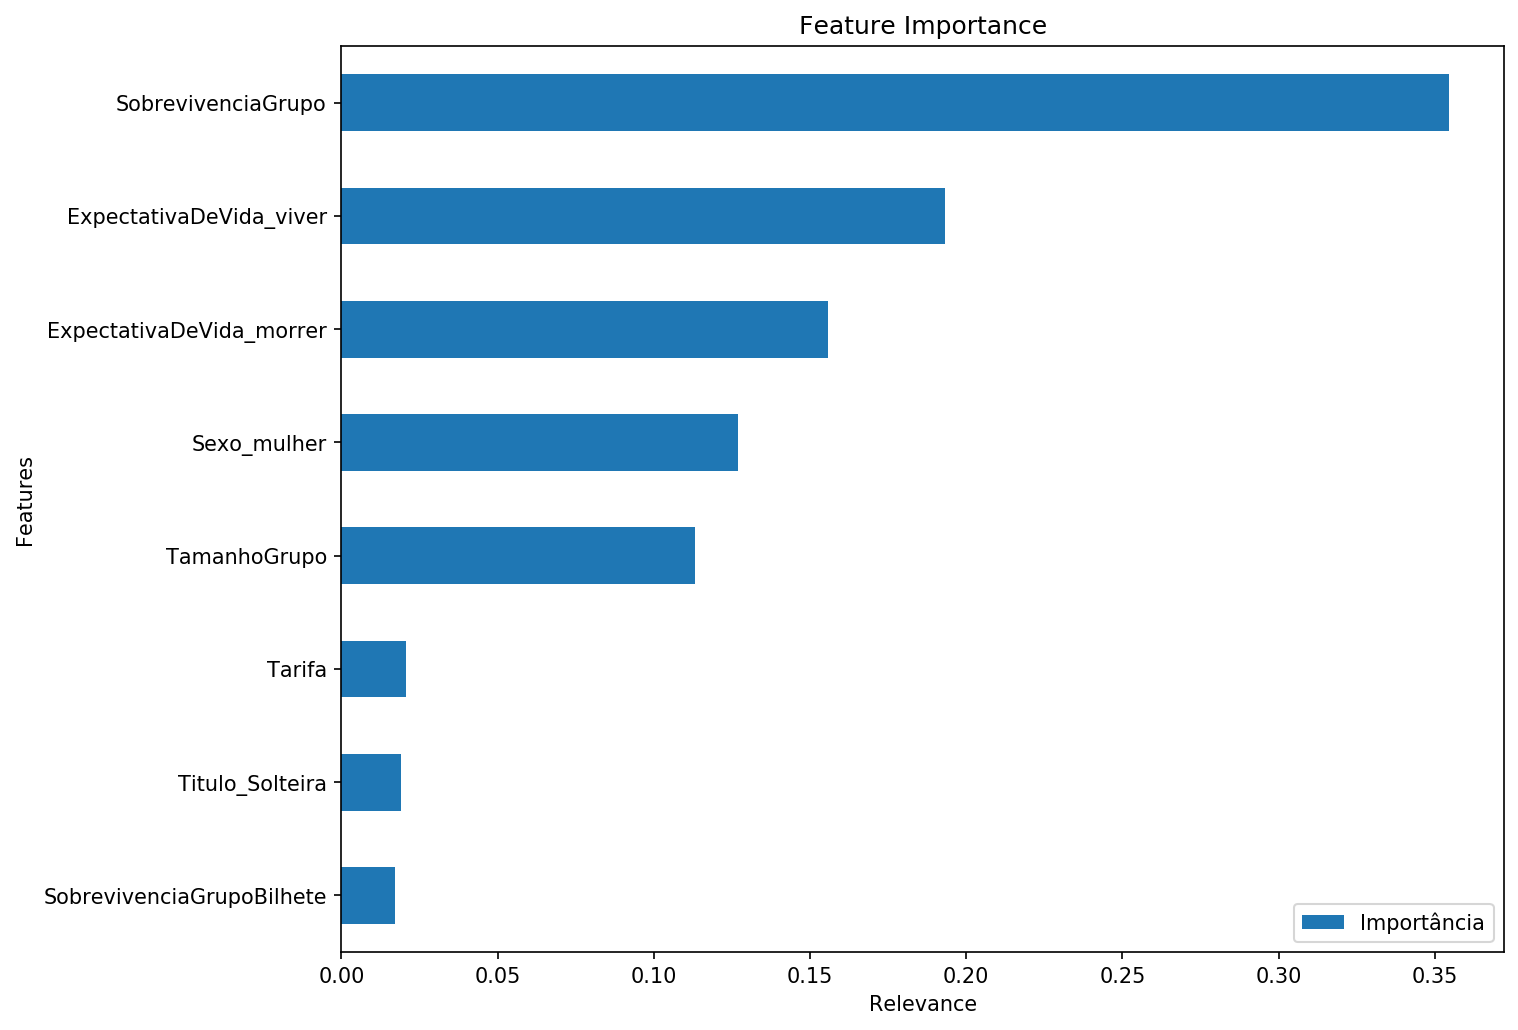

In [155]:
cols = X_train.columns.values

df_features = pd.DataFrame({'recursos':cols,
                           'Importância':rf_features})

df_features.sort_values(by='Importância').plot.barh(x='recursos')
plt.title('Feature Importance')
fig = plt.gcf()
fig.set_size_inches(10,8)
fig.set_dpi(150)
plt.ylabel('Features')
plt.xlabel('Relevance')
plt.show()

In [156]:
df_features

,recursos,Importância
0,Tarifa,0.020531
1,TamanhoGrupo,0.113249
2,SobrevivenciaGrupo,0.354401
3,SobrevivenciaGrupoBilhete,0.017023
4,Sexo_mulher,0.126818
5,Titulo_Solteira,0.018992
6,ExpectativaDeVida_morrer,0.155815
7,ExpectativaDeVida_viver,0.193173


In [157]:
cust_ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=10,
                                                   p=2, weights='uniform')),
                             ('RBF',
                              SVC(C=0.5, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='rbf', max_iter=-1,
                                  probability=True, random...
                                                     splitter='best')),
                             ('NB',
                              Gaussia

In [158]:
cust_ensemble.score(X_test, y_test)

0.8917910447761194

In [165]:
ensemble_pred = cust_ensemble.predict(test[recursos])

In [166]:
ensemble_pred.shape

(418,)

In [167]:
test.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

## Submissão

In [168]:
submissao = pd.DataFrame({
    'PassengerId':test.index,
    'Survived': ensemble_pred
})

In [169]:
submissao.shape

(418, 2)

In [172]:
submissao['Survived'] = submissao['Survived'].astype(int)

In [173]:
submissao.to_csv('CSVs/titanic/cust_ensemble.csv', index=False)